<a href="https://colab.research.google.com/github/RFankhauser/MSc_WI_BINA/blob/main/Semesterarbeit/Datenanalyse_%C3%96V_250222.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import der Daten und grundlegende Analyse

### Import der Daten

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#--------------------------------------------
# Nachfolgenden Code für lokalen Import verwenden
# Datei-Pfad für macOS anpassen
# file_path = r"/Users/remofankhauser/20250222_istdaten.csv"
# Datei einlesen
# df_raw = pd.read_csv(file_path, sep=None)
#--------------------------------------------

# Import aus GitHub
#url="https://raw.githubusercontent.com/RFankhauser/MSc_WI_BINA/refs/heads/main/Semesterarbeit/Verkehrsdaten/20250222_vbz_filtered.csv"
df_raw = pd.read_csv("Verkehrs_Daten_2024.csv", sep=",", low_memory=False)

# Datenstruktur und erste Zeile anzeigen
display(df_raw.head(10))



,BETRIEBSTAG,BETREIBER_ABK,BETREIBER_NAME,PRODUKT_ID,LINIEN_TEXT,ZUSATZFAHRT_TF,FAELLT_AUS_TF,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF
0,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,12,False,False,Glattpark,01.01.2024 11:32,01.01.2024 11:32:32,REAL,01.01.2024 11:33,01.01.2024 11:32:52,REAL,False
1,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Bahnhofstrasse/HB",01.01.2024 10:06,01.01.2024 10:06:40,REAL,01.01.2024 10:06,01.01.2024 10:06:52,REAL,False
2,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Central",01.01.2024 10:03,01.01.2024 10:03:40,REAL,01.01.2024 10:04,01.01.2024 10:04:11,REAL,False
3,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Haldenegg",01.01.2024 10:02,01.01.2024 10:02:16,REAL,01.01.2024 10:02,01.01.2024 10:02:22,REAL,False
4,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Sonneggstrasse",01.01.2024 10:01,01.01.2024 10:01:22,REAL,01.01.2024 10:01,01.01.2024 10:01:35,REAL,False
5,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Ottikerstrasse",01.01.2024 10:00,01.01.2024 10:00:28,REAL,01.01.2024 10:00,01.01.2024 10:00:42,REAL,False
6,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Röslistrasse",01.01.2024 09:59,01.01.2024 09:59:40,REAL,01.01.2024 09:59,01.01.2024 09:59:48,REAL,False
7,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Schaffhauserplatz",01.01.2024 09:57,01.01.2024 09:58:10,REAL,01.01.2024 09:58,01.01.2024 09:58:40,REAL,False
8,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Guggachstrasse",01.01.2024 09:56,01.01.2024 09:56:56,REAL,01.01.2024 09:56,01.01.2024 09:57:12,REAL,False
9,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Milchbuck",01.01.2024 09:55,01.01.2024 09:55:56,REAL,01.01.2024 09:55,01.01.2024 09:56:14,REAL,False


In [2]:
print(df_raw["ABFAHRTSZEIT"].head(10))
print(df_raw["AB_PROGNOSE"].head(10))

0    01.01.2024 11:33
1    01.01.2024 10:06
2    01.01.2024 10:04
3    01.01.2024 10:02
4    01.01.2024 10:01
5    01.01.2024 10:00
6    01.01.2024 09:59
7    01.01.2024 09:58
8    01.01.2024 09:56
9    01.01.2024 09:55
Name: ABFAHRTSZEIT, dtype: object
0    01.01.2024 11:32:52
1    01.01.2024 10:06:52
2    01.01.2024 10:04:11
3    01.01.2024 10:02:22
4    01.01.2024 10:01:35
5    01.01.2024 10:00:42
6    01.01.2024 09:59:48
7    01.01.2024 09:58:40
8    01.01.2024 09:57:12
9    01.01.2024 09:56:14
Name: AB_PROGNOSE, dtype: object


### Analyse der Rohdaten

In [3]:
# Spalten in datetime konvertieren
df_raw["ABFAHRTSZEIT"] = pd.to_datetime(df_raw["ABFAHRTSZEIT"], format="%d.%m.%Y %H:%M", errors="coerce")
df_raw["AB_PROGNOSE"] = pd.to_datetime(df_raw["AB_PROGNOSE"], format="%d.%m.%Y %H:%M:%S", errors="coerce")



display(df_raw.head(10))

,BETRIEBSTAG,BETREIBER_ABK,BETREIBER_NAME,PRODUKT_ID,LINIEN_TEXT,ZUSATZFAHRT_TF,FAELLT_AUS_TF,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF
0,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,12,False,False,Glattpark,01.01.2024 11:32,01.01.2024 11:32:32,REAL,2024-01-01 11:33:00,2024-01-01 11:32:52,REAL,False
1,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Bahnhofstrasse/HB",01.01.2024 10:06,01.01.2024 10:06:40,REAL,2024-01-01 10:06:00,2024-01-01 10:06:52,REAL,False
2,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Central",01.01.2024 10:03,01.01.2024 10:03:40,REAL,2024-01-01 10:04:00,2024-01-01 10:04:11,REAL,False
3,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Haldenegg",01.01.2024 10:02,01.01.2024 10:02:16,REAL,2024-01-01 10:02:00,2024-01-01 10:02:22,REAL,False
4,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Sonneggstrasse",01.01.2024 10:01,01.01.2024 10:01:22,REAL,2024-01-01 10:01:00,2024-01-01 10:01:35,REAL,False
5,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Ottikerstrasse",01.01.2024 10:00,01.01.2024 10:00:28,REAL,2024-01-01 10:00:00,2024-01-01 10:00:42,REAL,False
6,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Röslistrasse",01.01.2024 09:59,01.01.2024 09:59:40,REAL,2024-01-01 09:59:00,2024-01-01 09:59:48,REAL,False
7,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Schaffhauserplatz",01.01.2024 09:57,01.01.2024 09:58:10,REAL,2024-01-01 09:58:00,2024-01-01 09:58:40,REAL,False
8,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Guggachstrasse",01.01.2024 09:56,01.01.2024 09:56:56,REAL,2024-01-01 09:56:00,2024-01-01 09:57:12,REAL,False
9,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Milchbuck",01.01.2024 09:55,01.01.2024 09:55:56,REAL,2024-01-01 09:55:00,2024-01-01 09:56:14,REAL,False


In [4]:
# Liste der zu entfernenden Spalten
columns_to_drop = [
    "ANKUNFTSZEIT", 
    "AN_PROGNOSE", 
    "AN_PROGNOSE_STATUS", 
]

df_raw = df_raw.drop(columns=columns_to_drop)

print(f"Länge des DF: {len(df_raw)}")

Länge des DF: 32920596


In [5]:


# Datenstruktur und erste Zeile anzeigen
display(df_raw.info())

# Welche Verkehrsmittel gibt es im Dataframe?
Verkehrsmittel = df_raw["PRODUKT_ID"].unique()
print(f"Verkehrsmittel: {sorted(Verkehrsmittel)}")

# Welche Verkehrsbetriebe gibt es im Dataframe?
Verkehrsbetriebe = df_raw["BETREIBER_NAME"].unique()
print(f"Verkehrsbetriebe: {sorted(Verkehrsbetriebe)}")

# Welche Verkehrsbetriebe (Abk) gibt es im Dataframe?
Verkehrsbetriebe_abk = df_raw["BETREIBER_ABK"].unique()
print(f"Abkürzungen: {sorted(Verkehrsbetriebe_abk)}")

# Datenstruktur und erste Zeile anzeigen
display(df_raw.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32920596 entries, 0 to 32920595
Data columns (total 12 columns):
 #   Column              Dtype         
---  ------              -----         
 0   BETRIEBSTAG         object        
 1   BETREIBER_ABK       object        
 2   BETREIBER_NAME      object        
 3   PRODUKT_ID          object        
 4   LINIEN_TEXT         object        
 5   ZUSATZFAHRT_TF      bool          
 6   FAELLT_AUS_TF       bool          
 7   HALTESTELLEN_NAME   object        
 8   ABFAHRTSZEIT        datetime64[ns]
 9   AB_PROGNOSE         datetime64[ns]
 10  AB_PROGNOSE_STATUS  object        
 11  DURCHFAHRT_TF       bool          
dtypes: bool(3), datetime64[ns](2), object(7)
memory usage: 2.3+ GB


None

Verkehrsmittel: ['Tram']
Verkehrsbetriebe: ['Verkehrsbetriebe Zürich INFO+']
Abkürzungen: ['VBZ    Fpl']


,BETRIEBSTAG,BETREIBER_ABK,BETREIBER_NAME,PRODUKT_ID,LINIEN_TEXT,ZUSATZFAHRT_TF,FAELLT_AUS_TF,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF
0,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,12,False,False,Glattpark,2024-01-01 11:33:00,2024-01-01 11:32:52,REAL,False
1,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Bahnhofstrasse/HB",2024-01-01 10:06:00,2024-01-01 10:06:52,REAL,False
2,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Central",2024-01-01 10:04:00,2024-01-01 10:04:11,REAL,False
3,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Haldenegg",2024-01-01 10:02:00,2024-01-01 10:02:22,REAL,False
4,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Sonneggstrasse",2024-01-01 10:01:00,2024-01-01 10:01:35,REAL,False
5,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Ottikerstrasse",2024-01-01 10:00:00,2024-01-01 10:00:42,REAL,False
6,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Röslistrasse",2024-01-01 09:59:00,2024-01-01 09:59:48,REAL,False
7,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Schaffhauserplatz",2024-01-01 09:58:00,2024-01-01 09:58:40,REAL,False
8,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Guggachstrasse",2024-01-01 09:56:00,2024-01-01 09:57:12,REAL,False
9,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Milchbuck",2024-01-01 09:55:00,2024-01-01 09:56:14,REAL,False


## Analyse der VBZ Daten

### Im Dataframe enthaltenen VBZ-Linien

In [6]:
# Beispiel: Gruppieren nach "PRODUKT_ID" (Tram, Bus, ...)
gruppen = df_raw.groupby("PRODUKT_ID")["LINIEN_TEXT"].unique()
print("Alle ÖV-Linien nach Verkehrsmittel")

# Ausgabe: für jede Verkehrsart alle Linien in einer Zeile
for verkehrsmittel, linien in gruppen.items():
    linien_als_text = ", ".join(map(str, linien))
    print(f"{verkehrsmittel}: {linien_als_text}")

Alle ÖV-Linien nach Verkehrsmittel
Tram: 12, 7, 6, 5, 9, 8, 3, 2, 4, 13, 14, 17, 15, 10, 11, E


### Verspätungen berechnen und ausgeben

In [7]:
# Berechne Verspätung in Sekunden
df_raw["VERSPAETUNG_AB"] = (df_raw["ABFAHRTSZEIT"] - df_raw["AB_PROGNOSE"]).dt.total_seconds()


df_filtered_vbz_verspetungen_ab = df_raw[df_raw["VERSPAETUNG_AB"] > 0]




display(df_filtered_vbz_verspetungen_ab.head(10))
print(f"Länge des DF: {len(df_filtered_vbz_verspetungen_ab)}")




,BETRIEBSTAG,BETREIBER_ABK,BETREIBER_NAME,PRODUKT_ID,LINIEN_TEXT,ZUSATZFAHRT_TF,FAELLT_AUS_TF,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF,VERSPAETUNG_AB
0,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,12,False,False,Glattpark,2024-01-01 11:33:00,2024-01-01 11:32:52,REAL,False,8.0
24,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Schwamendingerplatz",2024-01-01 09:36:00,2024-01-01 09:35:57,REAL,False,3.0
40,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,True,"Zürich, Rennweg",2024-01-01 10:42:00,2024-01-01 10:41:57,REAL,False,3.0
62,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Guggachstrasse",2024-01-01 09:29:00,2024-01-01 09:28:44,REAL,False,16.0
63,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Schaffhauserplatz",2024-01-01 09:28:00,2024-01-01 09:27:46,REAL,False,14.0
64,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Röslistrasse",2024-01-01 09:26:00,2024-01-01 09:25:56,REAL,False,4.0
65,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Ottikerstrasse",2024-01-01 09:25:00,2024-01-01 09:24:58,REAL,False,2.0
86,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Schwamendingerplatz",2024-01-01 08:06:00,2024-01-01 08:05:37,REAL,False,23.0
91,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Guggachstrasse",2024-01-01 07:59:00,2024-01-01 07:58:54,REAL,False,6.0
92,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Schaffhauserplatz",2024-01-01 07:58:00,2024-01-01 07:57:50,REAL,False,10.0


Länge des DF: 4289155


In [13]:
# Stelle sicher, dass BETRIEBSTAG als Datetime-Format vorliegt
df_filtered_vbz_verspetungen_ab["BETRIEBSTAG"] = pd.to_datetime(df_filtered_vbz_verspetungen_ab["BETRIEBSTAG"])

# Definiere den gewünschten Zeitraum -> Wichtig: Remo muss Daten von Zeitraum zur verfügung stellen!!!
start_date = "2022-01-01"
end_date = "2025-01-01"

# Filtere das DataFrame nach dem Zeitraum
df_filtered_vbz_verspetungen_ab = df_filtered_vbz_verspetungen_ab[
    (df_filtered_vbz_verspetungen_ab["BETRIEBSTAG"] >= start_date) & 
    (df_filtered_vbz_verspetungen_ab["BETRIEBSTAG"] <= end_date)
]

# Zeige die ersten 10 Zeilen an
display(df_filtered_vbz_verspetungen_ab.head(10))
print(f"Länge des DF nach Datumsfilter: {len(df_filtered_vbz_verspetungen_ab)}")

C:\Users\Donat\AppData\Local\Temp\ipykernel_18300\3575653123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_vbz_verspetungen_ab["BETRIEBSTAG"] = pd.to_datetime(df_filtered_vbz_verspetungen_ab["BETRIEBSTAG"])


,BETRIEBSTAG,BETREIBER_ABK,BETREIBER_NAME,PRODUKT_ID,LINIEN_TEXT,ZUSATZFAHRT_TF,FAELLT_AUS_TF,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF,VERSPAETUNG_AB
0,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,12,False,False,Glattpark,2024-01-01 11:33:00,2024-01-01 11:32:52,REAL,False,8.0
24,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Schwamendingerplatz",2024-01-01 09:36:00,2024-01-01 09:35:57,REAL,False,3.0
40,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,True,"Zürich, Rennweg",2024-01-01 10:42:00,2024-01-01 10:41:57,REAL,False,3.0
62,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Guggachstrasse",2024-01-01 09:29:00,2024-01-01 09:28:44,REAL,False,16.0
63,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Schaffhauserplatz",2024-01-01 09:28:00,2024-01-01 09:27:46,REAL,False,14.0
64,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Röslistrasse",2024-01-01 09:26:00,2024-01-01 09:25:56,REAL,False,4.0
65,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Ottikerstrasse",2024-01-01 09:25:00,2024-01-01 09:24:58,REAL,False,2.0
86,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Schwamendingerplatz",2024-01-01 08:06:00,2024-01-01 08:05:37,REAL,False,23.0
91,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Guggachstrasse",2024-01-01 07:59:00,2024-01-01 07:58:54,REAL,False,6.0
92,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Schaffhauserplatz",2024-01-01 07:58:00,2024-01-01 07:57:50,REAL,False,10.0


Länge des DF nach Datumsfilter: 4289155


### Analyse der Daten

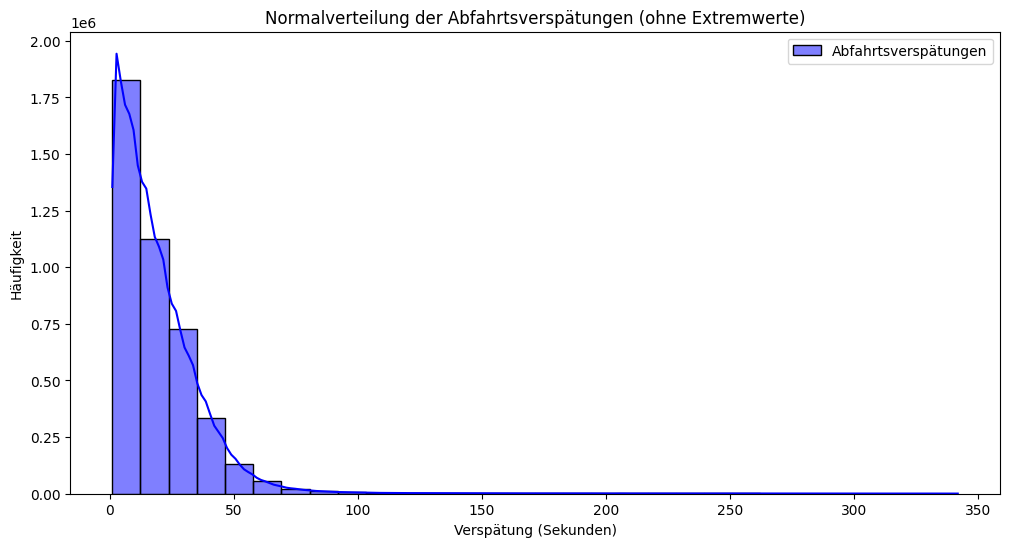

In [14]:
#Donat


# Funktion zur Filterung von Extremwerten (Outlier)
def filter_extreme_values(data, column, std_threshold=1):
    """
    Filtert die Daten, um nur Werte innerhalb von `std_threshold` Standardabweichungen vom Mittelwert zu behalten.
    """
    mean = data[column].mean()
    std = data[column].std()
    lower_bound = mean - std_threshold * std
    upper_bound = mean + std_threshold * std
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Filtere die Verspätungen, um Extremwerte auszuschließen
df_filtered_ab = filter_extreme_values(df_filtered_vbz_verspetungen_ab, "VERSPAETUNG_AB", std_threshold=2)


# Plot für Abfahrtsverspätungen
plt.figure(figsize=(12, 6))
sns.histplot(df_filtered_ab["VERSPAETUNG_AB"], bins=30, kde=True, color='blue', label='Abfahrtsverspätungen')
plt.title("Normalverteilung der Abfahrtsverspätungen (ohne Extremwerte)")
plt.xlabel("Verspätung (Sekunden)")
plt.ylabel("Häufigkeit")
plt.legend()
plt.show()



In [16]:
#Donat2
# Funktion zur Berechnung der Extremwerte und des Schwellenwerts
def calculate_extremes(data, column, std_threshold=2):
    """
    Berechnet die Anzahl der Extremwerte und den Schwellenwert für Extremwerte.
    """
    mean = data[column].mean()
    std = data[column].std()
    lower_bound = mean - std_threshold * std
    upper_bound = mean + std_threshold * std

    # Anzahl der Extremwerte
    extreme_values = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    num_extremes = len(extreme_values)

    # Schwellenwert für Extremwerte
    extreme_threshold = max(abs(lower_bound), abs(upper_bound))

    return num_extremes, extreme_threshold

Anzahl_Datenpunkte_ab=len(df_filtered_vbz_verspetungen_ab)

# Berechne Extremwerte für Abfahrtsverspätungen
num_extremes_ab, threshold_ab = calculate_extremes(df_filtered_vbz_verspetungen_ab, "VERSPAETUNG_AB", std_threshold=2)
print(f"Anzahl der Extremwerte bei Abfahrtsverspätungen: {num_extremes_ab} (Total: {Anzahl_Datenpunkte_ab})")
print(f"Extremwerte bei Abfahrtsverspätungen liegen außerhalb von ±{threshold_ab:.2f} Sekunden.\n")



Anzahl der Extremwerte bei Abfahrtsverspätungen: 20476 (Total: 4289155)
Extremwerte bei Abfahrtsverspätungen liegen außerhalb von ±342.67 Sekunden.



In [17]:


# Filtere alle Zeilen, in denen die Verspätung > 5 Minuten (300sekunden) ist
df_greater_5_ab = df_filtered_vbz_verspetungen_ab[df_filtered_vbz_verspetungen_ab["VERSPAETUNG_AB"] > 300]

# Anzahl der betroffenen Zeilen
count_ab = len(df_greater_5_ab)

print(f"Anzahl der Datenpunkte mit mehr als 5 Minuten Verspätung: {count_ab}")

Anzahl der Datenpunkte mit mehr als 5 Minuten Verspätung: 23384


In [18]:
#Aggregiere die Verspätungen auf stündliche Intervalle
# Neue Spalte: Stündlich abgerundeter Timestamp (z. B. 2025-02-22 12:00:00)
df_filtered_vbz_verspetungen_ab["ABFAHRTSZEIT_aggregiert"] = df_filtered_vbz_verspetungen_ab["ABFAHRTSZEIT"].dt.floor("H")
display(df_filtered_vbz_verspetungen_ab.head(10))

C:\Users\Donat\AppData\Local\Temp\ipykernel_18300\2102033213.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_filtered_vbz_verspetungen_ab["ABFAHRTSZEIT_aggregiert"] = df_filtered_vbz_verspetungen_ab["ABFAHRTSZEIT"].dt.floor("H")


,BETRIEBSTAG,BETREIBER_ABK,BETREIBER_NAME,PRODUKT_ID,LINIEN_TEXT,ZUSATZFAHRT_TF,FAELLT_AUS_TF,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF,VERSPAETUNG_AB,ABFAHRTSZEIT_aggregiert
0,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,12,False,False,Glattpark,2024-01-01 11:33:00,2024-01-01 11:32:52,REAL,False,8.0,2024-01-01 11:00:00
24,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Schwamendingerplatz",2024-01-01 09:36:00,2024-01-01 09:35:57,REAL,False,3.0,2024-01-01 09:00:00
40,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,True,"Zürich, Rennweg",2024-01-01 10:42:00,2024-01-01 10:41:57,REAL,False,3.0,2024-01-01 10:00:00
62,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Guggachstrasse",2024-01-01 09:29:00,2024-01-01 09:28:44,REAL,False,16.0,2024-01-01 09:00:00
63,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Schaffhauserplatz",2024-01-01 09:28:00,2024-01-01 09:27:46,REAL,False,14.0,2024-01-01 09:00:00
64,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Röslistrasse",2024-01-01 09:26:00,2024-01-01 09:25:56,REAL,False,4.0,2024-01-01 09:00:00
65,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Ottikerstrasse",2024-01-01 09:25:00,2024-01-01 09:24:58,REAL,False,2.0,2024-01-01 09:00:00
86,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Schwamendingerplatz",2024-01-01 08:06:00,2024-01-01 08:05:37,REAL,False,23.0,2024-01-01 08:00:00
91,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Guggachstrasse",2024-01-01 07:59:00,2024-01-01 07:58:54,REAL,False,6.0,2024-01-01 07:00:00
92,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Schaffhauserplatz",2024-01-01 07:58:00,2024-01-01 07:57:50,REAL,False,10.0,2024-01-01 07:00:00


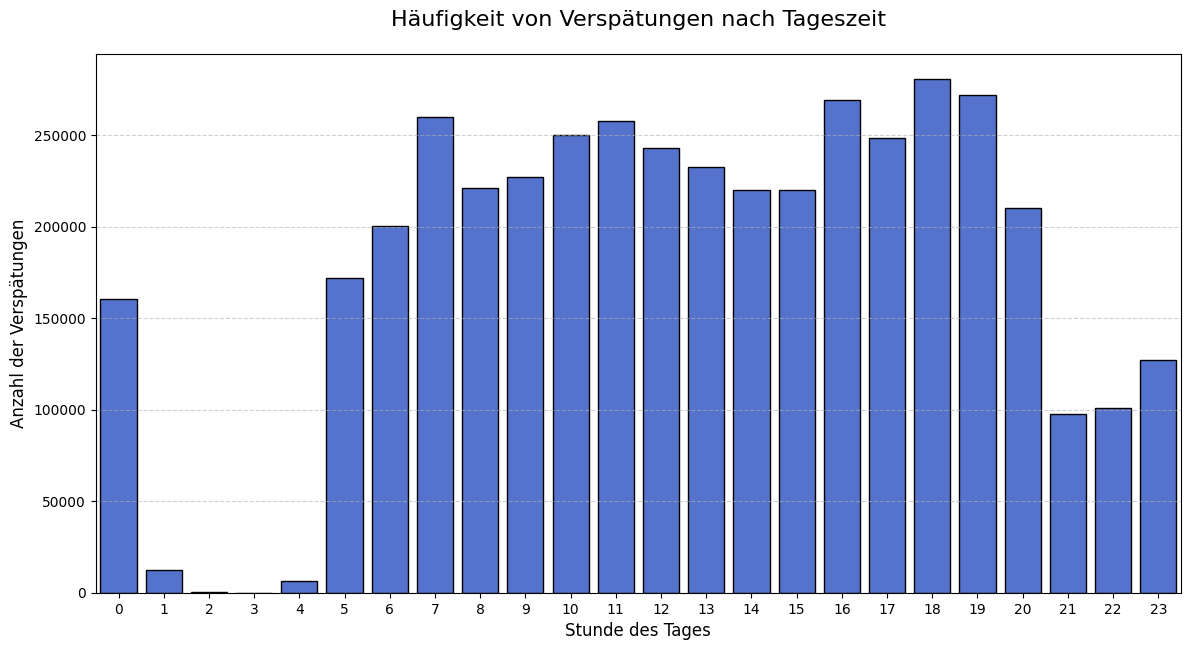

In [19]:
# Extrahiere die Stunde aus der aggregierten Abfahrtszeit
df_filtered_vbz_verspetungen_ab["hour"] = df_filtered_vbz_verspetungen_ab["ABFAHRTSZEIT_aggregiert"].dt.hour

# Gruppiere nach Stunde und zähle die Verspätungen
delay_counts = (
    df_filtered_vbz_verspetungen_ab
    .groupby("hour")
    .size()  # Zählt alle Einträge pro Stunde
    .reset_index(name="Anzahl_Verspaetungen")
)

# Stelle sicher, dass alle 24 Stunden im Plot erscheinen (auch Stunden ohne Verspätungen)
all_hours = pd.DataFrame({"hour": range(24)})
delay_counts = all_hours.merge(delay_counts, on="hour", how="left").fillna(0)

# Plot mit Seaborn
plt.figure(figsize=(14, 7))
sns.barplot(
    x="hour",
    y="Anzahl_Verspaetungen",
    data=delay_counts,
    color="royalblue",
    edgecolor="black"
)

# Formatierung
plt.title("Häufigkeit von Verspätungen nach Tageszeit", fontsize=16, pad=20)
plt.xlabel("Stunde des Tages", fontsize=12)
plt.ylabel("Anzahl der Verspätungen", fontsize=12)
plt.xticks(range(0, 24))
plt.xlim(-0.5, 23.5)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

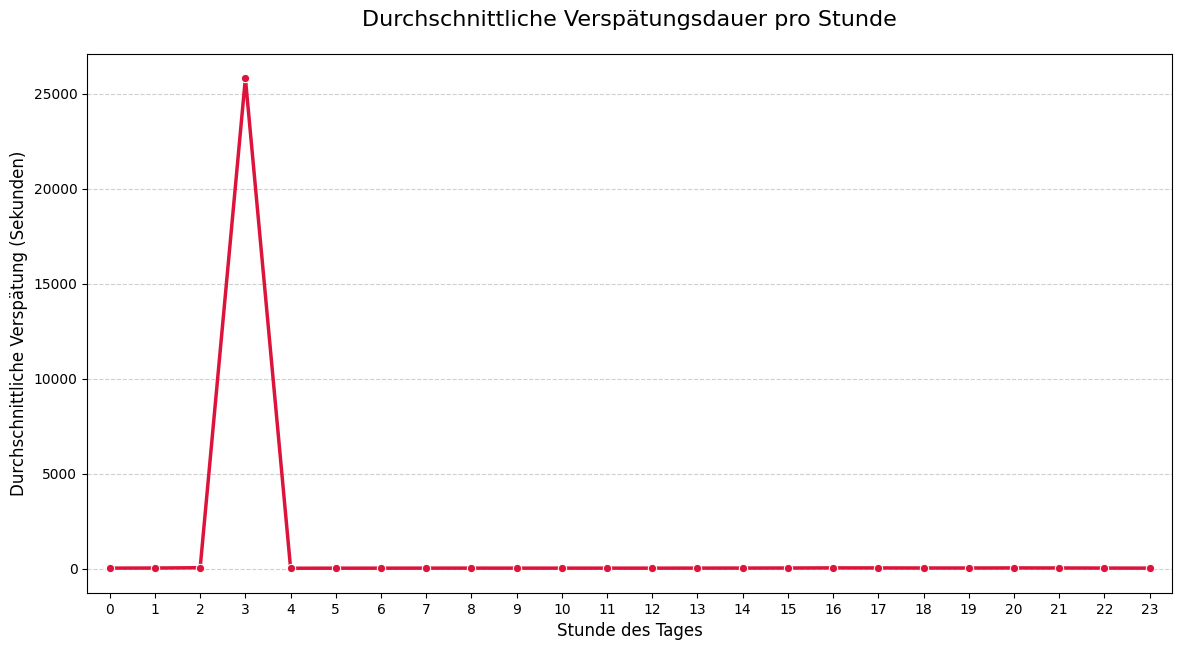

In [20]:
# Extrahiere die Stunde aus der aggregierten Abfahrtszeit
df_filtered_vbz_verspetungen_ab["hour"] = df_filtered_vbz_verspetungen_ab["ABFAHRTSZEIT_aggregiert"].dt.hour

# Berechne die durchschnittliche Verspätung pro Stunde
average_delay = (
    df_filtered_vbz_verspetungen_ab
    .groupby("hour")["VERSPAETUNG_AB"]
    .mean()  # Durchschnitt pro Stunde
    .reset_index(name="durchschnittliche_verspaetung_sekunden")
)

# Stelle sicher, dass alle 24 Stunden im Plot erscheinen (auch Stunden ohne Daten)
all_hours = pd.DataFrame({"hour": range(24)})
average_delay = all_hours.merge(average_delay, on="hour", how="left").fillna(0)

# Plot mit Seaborn (Liniendiagramm)
plt.figure(figsize=(14, 7))
sns.lineplot(
    x="hour",
    y="durchschnittliche_verspaetung_sekunden",
    data=average_delay,
    marker="o",
    color="crimson",
    linewidth=2.5
)



# Formatierung
plt.title("Durchschnittliche Verspätungsdauer pro Stunde", fontsize=16, pad=20)
plt.xlabel("Stunde des Tages", fontsize=12)
plt.ylabel("Durchschnittliche Verspätung (Sekunden)", fontsize=12)
plt.xticks(range(0, 24))
plt.xlim(-0.5, 23.5)
plt.grid(axis="y", linestyle="--", alpha=0.6)


plt.show()

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 1.1 Wetterdatensatz 1 einlesen (Böenspitze_kmh, Globalstrahlung_Wm2, Temperatur_C, Niederschlag_mm, Windgeschwindigkeit_kmh)
url = "https://raw.githubusercontent.com/RFankhauser/MSc_WI_BINA/refs/heads/main/Semesterarbeit/Version_Donat/wetter_zurich_bereinigt.csv"
df_wetter1= pd.read_csv(url, sep=";", encoding="utf-8")

# 1.2 Spaltennamen anpassen (gemäß der Legende)
parameter_mapping1 = {
    "fu3010h1": "Böenspitze_kmh",
    "gre000h0": "Globalstrahlung_Wm2",
    "tre200h0": "Temperatur_C",
    "rre150h0": "Niederschlag_mm",
    "fu3010h0": "Windgeschwindigkeit_kmh"
}

df_wetter1 = df_wetter1.rename(columns=parameter_mapping1)


# 1.3 'time' in Datumsformat umwandeln
df_wetter1['time'] = pd.to_datetime(df_wetter1['time'], format='%Y%m%d%H', errors='coerce')

# 1.4 Filtern nach dem Jahr 2024
df_wetter1 = df_wetter1[df_wetter1['time'].dt.year == 2024]

# 1.5 Ersten 10 Zeilen anzeigen
display(df_wetter1.head(10))

# 1.6 Anzahl der Einträge für das Jahr 2024
anzahl_2024 = len(df_wetter1)
print(f"Anzahl der Einträge für 2024: {anzahl_2024}")


,stn,time,Böenspitze_kmh,Globalstrahlung_Wm2,Temperatur_C,Niederschlag_mm,Windgeschwindigkeit_kmh
17520,NABZUE,2024-01-01 00:00:00,40.7,3,5.1,0.0,10.4
17521,NABZUE,2024-01-01 01:00:00,24.8,-1,5.1,0.0,7.9
17522,NABZUE,2024-01-01 02:00:00,32.0,-1,5.2,0.0,9.4
17523,NABZUE,2024-01-01 03:00:00,21.2,0,5.3,0.1,9.4
17524,NABZUE,2024-01-01 04:00:00,50.4,0,4.9,1.1,15.5
17525,NABZUE,2024-01-01 05:00:00,33.5,0,5.3,0.0,12.6
17526,NABZUE,2024-01-01 06:00:00,33.8,0,5.6,0.0,10.4
17527,NABZUE,2024-01-01 07:00:00,36.7,0,6.0,0.0,11.9
17528,NABZUE,2024-01-01 08:00:00,35.3,12,6.3,0.0,11.9
17529,NABZUE,2024-01-01 09:00:00,31.3,51,6.7,0.0,10.1


Anzahl der Einträge für 2024: 8784


In [22]:
# 2.1 Wetterdatensatz 2 einlesen (Neuschneehöhe_cm,Schneehöhe_Morgenmessung_6_UTC_cm,Tag_mit_Hagel,Tag_mit_Nebel)
url2 = "https://raw.githubusercontent.com/RFankhauser/MSc_WI_BINA/refs/heads/main/Semesterarbeit/Version_Donat/Wetter_Zurich_Schnee_Nebel_Hagel.csv"
df_wetter2 = pd.read_csv(url2, sep=";", encoding="utf-8")

# 2.2 Spaltennamen anpassen (gemäß der Legende)
parameter_mapping2 = {
    "hns000d0": "Neuschneehöhe_cm",
    "hto000d0": "Schneehöhe_Morgenmessung_6_UTC_cm",
    "w3p002d0": "Tag_mit_Hagel",
    "w5p002d0": "Tag_mit_Nebel"
}

df_wetter2 = df_wetter2.rename(columns=parameter_mapping2)
df_wetter2 = df_wetter2.rename(columns={"stn": "stn2", "time": "time2"})

# 2.3 Konvertiere die 'time'-Spalte in df_wetter2 in das Datetime-Format
df_wetter2['time2'] = pd.to_datetime(df_wetter2['time2'], format='%Y%m%d', errors='coerce')


#  2.4 Ersten 10 Zeilen anzeigen
display(df_wetter2.head(10))

,stn2,time2,Neuschneehöhe_cm,Schneehöhe_Morgenmessung_6_UTC_cm,Tag_mit_Hagel,Tag_mit_Nebel
0,KLO,2024-01-01,0,0,0,0
1,KLO,2024-01-02,0,0,0,0
2,KLO,2024-01-03,0,0,0,0
3,KLO,2024-01-04,0,0,0,0
4,KLO,2024-01-05,0,0,0,0
5,KLO,2024-01-06,0,0,0,0
6,KLO,2024-01-07,0,0,0,0
7,KLO,2024-01-08,0,0,0,0
8,KLO,2024-01-09,2,0,0,0
9,KLO,2024-01-10,0,2,0,0


In [23]:
#Beide Wetter Datensätze mergen
# 3.1 Wiederhole die täglichen Werte von df_wetter2 für jede Stunde des Tages in df_wetter1
df_wetter2_repeated = df_wetter2.loc[df_wetter2.index.repeat(24)].reset_index(drop=True)

# 3.2 Kombiniere die beiden DataFrames
df_wetter = pd.concat([df_wetter1.reset_index(drop=True), df_wetter2_repeated], axis=1)

# 3.3 Entferne die Spalten 'stn2' und 'time2' aus dem kombinierten DataFrame
df_wetter = df_wetter.drop(columns=['stn2', 'time2'])

# 3.4 Zeige die ersten 10 Zeilen des kombinierten DataFrames an
display(df_wetter.head(10))

,stn,time,Böenspitze_kmh,Globalstrahlung_Wm2,Temperatur_C,Niederschlag_mm,Windgeschwindigkeit_kmh,Neuschneehöhe_cm,Schneehöhe_Morgenmessung_6_UTC_cm,Tag_mit_Hagel,Tag_mit_Nebel
0,NABZUE,2024-01-01 00:00:00,40.7,3,5.1,0.0,10.4,0,0,0,0
1,NABZUE,2024-01-01 01:00:00,24.8,-1,5.1,0.0,7.9,0,0,0,0
2,NABZUE,2024-01-01 02:00:00,32.0,-1,5.2,0.0,9.4,0,0,0,0
3,NABZUE,2024-01-01 03:00:00,21.2,0,5.3,0.1,9.4,0,0,0,0
4,NABZUE,2024-01-01 04:00:00,50.4,0,4.9,1.1,15.5,0,0,0,0
5,NABZUE,2024-01-01 05:00:00,33.5,0,5.3,0.0,12.6,0,0,0,0
6,NABZUE,2024-01-01 06:00:00,33.8,0,5.6,0.0,10.4,0,0,0,0
7,NABZUE,2024-01-01 07:00:00,36.7,0,6.0,0.0,11.9,0,0,0,0
8,NABZUE,2024-01-01 08:00:00,35.3,12,6.3,0.0,11.9,0,0,0,0
9,NABZUE,2024-01-01 09:00:00,31.3,51,6.7,0.0,10.1,0,0,0,0


In [ ]:
# 3. Zeitstempel konvertieren (ohne Zeitzonenanpassung)
df_wetter["timestamp_merge"] = pd.to_datetime(df_wetter["time"], format="%Y%m%d%H", errors="coerce")

# 4. Fehlende Werte behandeln
df_wetter = df_wetter.replace("-", pd.NA)


# 6. Merge mit den Verkehrsdaten
# Annahme: df_merged ist der DataFrame mit den Verkehrsdaten und enthält eine Spalte "ABFAHRTSZEIT_aggregiert"
df_merged = pd.merge(
    df_filtered_vbz_verspetungen_ab,  # Verkehrsdaten
    df_wetter,  # Wetterdaten
    left_on="ABFAHRTSZEIT_aggregiert",  # Zeitstempel in den Verkehrsdaten
    right_on="timestamp_merge",         # Zeitstempel in den Wetterdaten
    how="left"  # Behalte alle Verkehrsdaten, auch wenn keine Wetterdaten vorhanden sind
)

# 7. Überprüfen des gemergten DataFrames
display(df_merged.head(10))

,BETRIEBSTAG,BETREIBER_ABK,BETREIBER_NAME,PRODUKT_ID,LINIEN_TEXT,ZUSATZFAHRT_TF,FAELLT_AUS_TF,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,...,Böenspitze_kmh,Globalstrahlung_Wm2,Temperatur_C,Niederschlag_mm,Windgeschwindigkeit_kmh,Neuschneehöhe_cm,Schneehöhe_Morgenmessung_6_UTC_cm,Tag_mit_Hagel,Tag_mit_Nebel,timestamp_merge
0,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,12,False,False,Glattpark,2024-01-01 11:33:00,2024-01-01 11:32:52,...,34.9,318,7.9,0.0,13.3,0.0,0.0,0.0,0.0,2024-01-01 11:00:00
1,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Schwamendingerplatz",2024-01-01 09:36:00,2024-01-01 09:35:57,...,31.3,51,6.7,0.0,10.1,0.0,0.0,0.0,0.0,2024-01-01 09:00:00
2,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,True,"Zürich, Rennweg",2024-01-01 10:42:00,2024-01-01 10:41:57,...,32.4,91,6.8,0.0,11.2,0.0,0.0,0.0,0.0,2024-01-01 10:00:00
3,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Guggachstrasse",2024-01-01 09:29:00,2024-01-01 09:28:44,...,31.3,51,6.7,0.0,10.1,0.0,0.0,0.0,0.0,2024-01-01 09:00:00
4,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Schaffhauserplatz",2024-01-01 09:28:00,2024-01-01 09:27:46,...,31.3,51,6.7,0.0,10.1,0.0,0.0,0.0,0.0,2024-01-01 09:00:00
5,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Röslistrasse",2024-01-01 09:26:00,2024-01-01 09:25:56,...,31.3,51,6.7,0.0,10.1,0.0,0.0,0.0,0.0,2024-01-01 09:00:00
6,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Ottikerstrasse",2024-01-01 09:25:00,2024-01-01 09:24:58,...,31.3,51,6.7,0.0,10.1,0.0,0.0,0.0,0.0,2024-01-01 09:00:00
7,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Schwamendingerplatz",2024-01-01 08:06:00,2024-01-01 08:05:37,...,35.3,12,6.3,0.0,11.9,0.0,0.0,0.0,0.0,2024-01-01 08:00:00
8,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Guggachstrasse",2024-01-01 07:59:00,2024-01-01 07:58:54,...,36.7,0,6.0,0.0,11.9,0.0,0.0,0.0,0.0,2024-01-01 07:00:00
9,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Schaffhauserplatz",2024-01-01 07:58:00,2024-01-01 07:57:50,...,36.7,0,6.0,0.0,11.9,0.0,0.0,0.0,0.0,2024-01-01 07:00:00


In [25]:
print(df_merged.columns)

Index(['BETRIEBSTAG', 'BETREIBER_ABK', 'BETREIBER_NAME', 'PRODUKT_ID',
       'LINIEN_TEXT', 'ZUSATZFAHRT_TF', 'FAELLT_AUS_TF', 'HALTESTELLEN_NAME',
       'ABFAHRTSZEIT', 'AB_PROGNOSE', 'AB_PROGNOSE_STATUS', 'DURCHFAHRT_TF',
       'VERSPAETUNG_AB', 'ABFAHRTSZEIT_aggregiert', 'hour', 'stn', 'time',
       'Böenspitze_kmh', 'Globalstrahlung_Wm2', 'Temperatur_C',
       'Niederschlag_mm', 'Windgeschwindigkeit_kmh', 'Neuschneehöhe_cm',
       'Schneehöhe_Morgenmessung_6_UTC_cm', 'Tag_mit_Hagel', 'Tag_mit_Nebel',
       'timestamp_merge'],
      dtype='object')


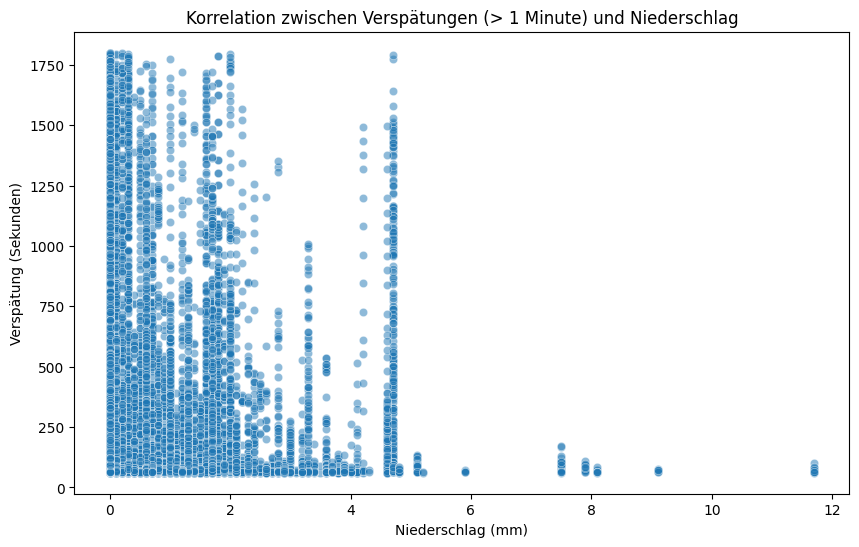

In [ ]:
# Filtere nur die Verspätungen zwischen 1 Minute (60 Sekunden) und 30 Minuten (1800 Sekunden)
df_delay_rain = df_merged[(df_merged["VERSPAETUNG_AB"] > 60) & (df_merged["VERSPAETUNG_AB"] <= 1800)]

# Erstelle einen Scatterplot für Verspätung vs. Niederschlag
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_delay_rain["Niederschlag_mm"], y=df_delay_rain["VERSPAETUNG_AB"], alpha=0.5)

# Achsenbeschriftung und Titel
plt.xlabel("Niederschlag (mm)")
plt.ylabel("Verspätung (Sekunden)")
plt.title("Korrelation zwischen Verspätungen (> 1 Minute) und Niederschlag")

# Anzeige des Diagramms
plt.show()

In [44]:
print(df_delay_rain["VERSPAETUNG_AB"].describe())

count    120634.000000
mean        196.599897
std         261.633749
min          61.000000
25%          68.000000
50%          84.000000
75%         200.000000
max        1800.000000
Name: VERSPAETUNG_AB, dtype: float64


In [45]:
correlation = df_delay_rain[["VERSPAETUNG_AB", "Niederschlag_mm"]].corr()
print("Korrelationsmatrix:")
print(correlation)

Korrelationsmatrix:
                 VERSPAETUNG_AB  Niederschlag_mm
VERSPAETUNG_AB          1.00000          0.05293
Niederschlag_mm         0.05293          1.00000


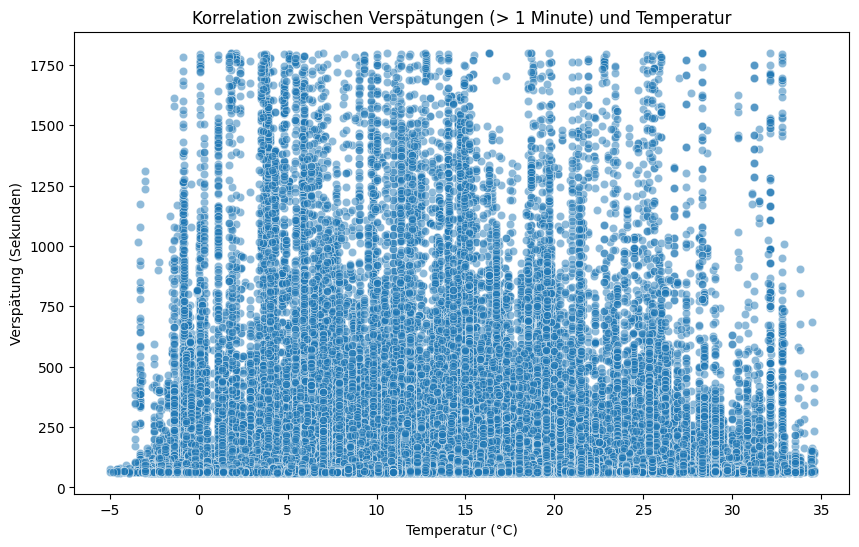

In [46]:

# Filtere nur die Verspätungen über 1 Minute (60 Sekunden)
df_delay_temp =  df_merged[(df_merged["VERSPAETUNG_AB"] > 60) & (df_merged["VERSPAETUNG_AB"] <= 1800)]

# Erstelle einen Scatterplot für Verspätung vs. Temperatur
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_delay_temp["Temperatur_C"], y=df_delay_temp["VERSPAETUNG_AB"], alpha=0.5)

# Achsenbeschriftung und Titel
plt.xlabel("Temperatur (°C)")
plt.ylabel("Verspätung (Sekunden)")
plt.title("Korrelation zwischen Verspätungen (> 1 Minute) und Temperatur")

# Anzeige des Diagramms
plt.show()

In [47]:
correlation = df_delay_temp[["VERSPAETUNG_AB", "Temperatur_C"]].corr()
print("Korrelationsmatrix:")
print(correlation)

Korrelationsmatrix:
                VERSPAETUNG_AB  Temperatur_C
VERSPAETUNG_AB        1.000000     -0.052093
Temperatur_C         -0.052093      1.000000


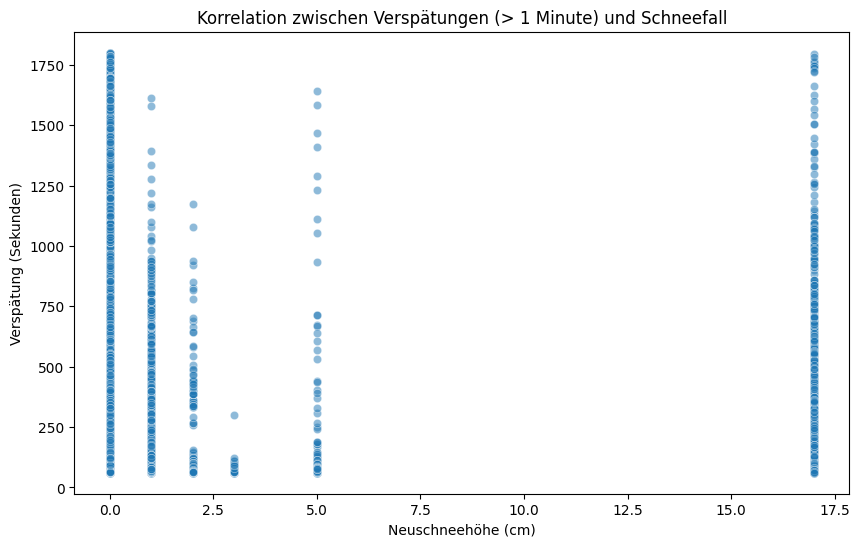

In [49]:
# Filtere nur die Verspätungen über 1 Minute (60 Sekunden)
df_delay_snow =  df_merged[(df_merged["VERSPAETUNG_AB"] > 60) & (df_merged["VERSPAETUNG_AB"] <= 1800)]

# Erstelle einen Scatterplot für Verspätung vs. Schneefall
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_delay_snow["Neuschneehöhe_cm"], y=df_delay_snow["VERSPAETUNG_AB"], alpha=0.5)

# Achsenbeschriftung und Titel
plt.xlabel("Neuschneehöhe (cm)")
plt.ylabel("Verspätung (Sekunden)")
plt.title("Korrelation zwischen Verspätungen (> 1 Minute) und Schneefall")

# Anzeige des Diagramms
plt.show()

In [50]:
correlation = df_delay_snow[["VERSPAETUNG_AB", "Neuschneehöhe_cm"]].corr()
print("Korrelationsmatrix:")
print(correlation)

Korrelationsmatrix:
                  VERSPAETUNG_AB  Neuschneehöhe_cm
VERSPAETUNG_AB          1.000000          0.055191
Neuschneehöhe_cm        0.055191          1.000000


C:\Users\Donat\AppData\Local\Temp\ipykernel_18300\2630022772.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_per_line.index, y=correlation_per_line.values, palette="Blues_r")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, '5'),
  Text(1, 0, '4'),
  Text(2, 0, '13'),
  Text(3, 0, '7'),
  Text(4, 0, '2'),
  Text(5, 0, '9'),
  Text(6, 0, '8'),
  Text(7, 0, '6'),
  Text(8, 0, '10'),
  Text(9, 0, '3'),
  Text(10, 0, '15'),
  Text(11, 0, '12'),
  Text(12, 0, '11'),
  Text(13, 0, '17'),
  Text(14, 0, '14')])

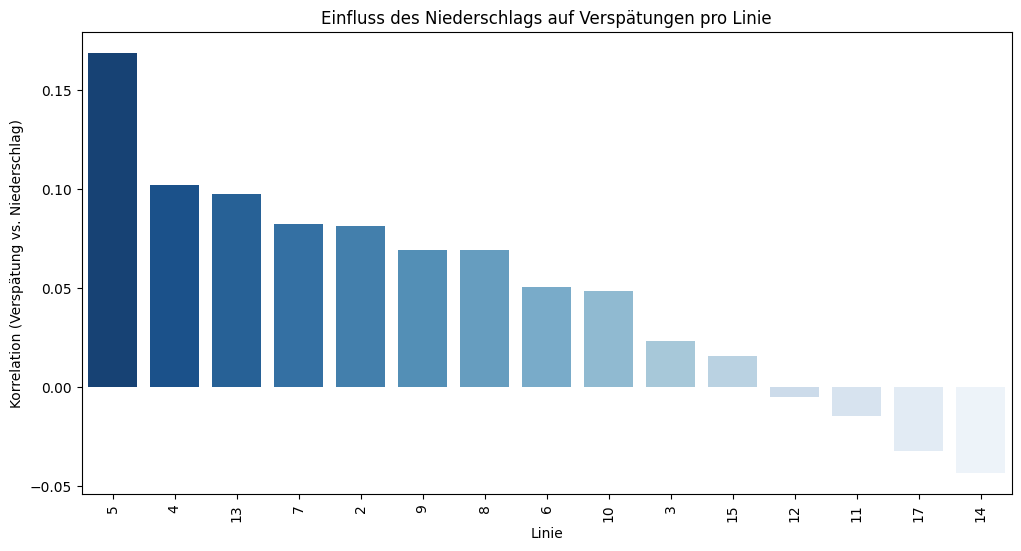

In [51]:
# Filtere Verspätungen zwischen 1 und 30 Minuten
df_filtered = df_merged[(df_merged["VERSPAETUNG_AB"] > 60) & (df_merged["VERSPAETUNG_AB"] <= 1800)]

# Berechne die Korrelation zwischen Verspätung und Niederschlag für jede Linie
correlation_per_line = df_filtered.groupby("LINIEN_TEXT")[["VERSPAETUNG_AB", "Niederschlag_mm"]].corr().unstack().iloc[:, 1]

# Sortiere nach der höchsten Korrelation
correlation_per_line = correlation_per_line.sort_values(ascending=False)

# Erstelle einen Balkendiagramm der Korrelationen
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_per_line.index, y=correlation_per_line.values, palette="Blues_r")

# Achsenbeschriftung und Titel
plt.xlabel("Linie")
plt.ylabel("Korrelation (Verspätung vs. Niederschlag)")
plt.title("Einfluss des Niederschlags auf Verspätungen pro Linie")

# Rotiert die X-Achse Labels für bessere Lesbarkeit
plt.xticks(rotation=90)

# Anzeige des Dia

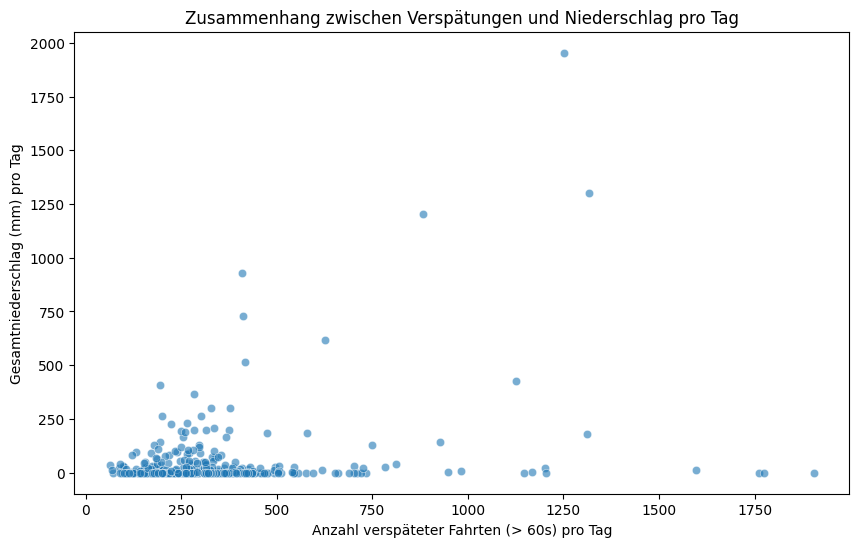

Korrelationsmatrix:
                    verspätungen_count  gesamtniederschlag
verspätungen_count              1.0000              0.2852
gesamtniederschlag              0.2852              1.0000


In [52]:

# Filtere nur Verspätungen über 1 Minute (60 Sekunden)
df_filtered = df_merged[df_merged["VERSPAETUNG_AB"] > 60]

# Aggregiere die Daten nach Betriebstag: Zähle die Anzahl der verspäteten Fahrten und summiere den Niederschlag
df_daily = df_filtered.groupby("BETRIEBSTAG").agg(
    verspätungen_count=("VERSPAETUNG_AB", "count"),
    gesamtniederschlag=("Niederschlag_mm", "sum")
).reset_index()

# Erstelle einen Scatterplot: Anzahl der Verspätungen vs. Gesamtniederschlag pro Tag
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_daily["verspätungen_count"], y=df_daily["gesamtniederschlag"], alpha=0.6)

# Achsenbeschriftung und Titel
plt.xlabel("Anzahl verspäteter Fahrten (> 60s) pro Tag")
plt.ylabel("Gesamtniederschlag (mm) pro Tag")
plt.title("Zusammenhang zwischen Verspätungen und Niederschlag pro Tag")

# Anzeige des Diagramms
plt.show()

# Berechne die Korrelation zwischen Verspätungsanzahl und Niederschlag
correlation = df_daily[["verspätungen_count", "gesamtniederschlag"]].corr()
print("Korrelationsmatrix:")
print(correlation)